# Clustering with KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets, mixture

import time
import warnings
import queue
import numpy as np
import pandas as pd

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler



import numpy as np
import pandas as pd


from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from random import sample

from itertools import cycle, islice

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1000
n_components = 2 # the number of clusters


X1, y1 = datasets.make_blobs(n_samples=n_samples, random_state=1)
X2, y2 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=0.05)
X4, y4 = np.random.rand(n_samples, 2), None

# 1. Dataset - 3 Blobs 

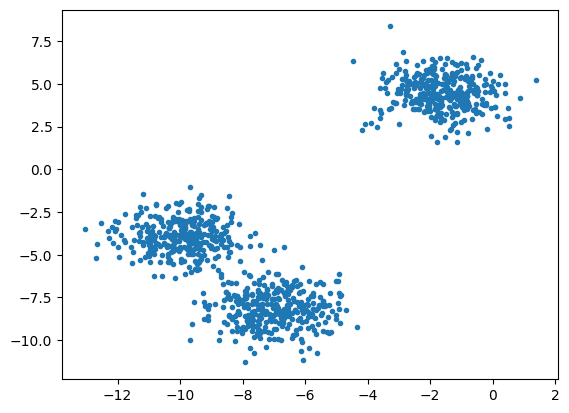

In [38]:
plt.scatter(X1[:,0], X1[:,1], alpha=1, marker='.')

In [39]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(X1)
labels

array([0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1,

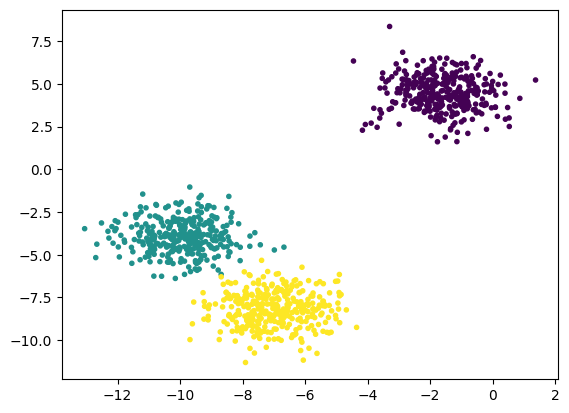

In [40]:
plt.scatter(X1[:,0], X1[:,1], c=labels, alpha=1, marker='.')

# 2. Dataset - Two Circles 

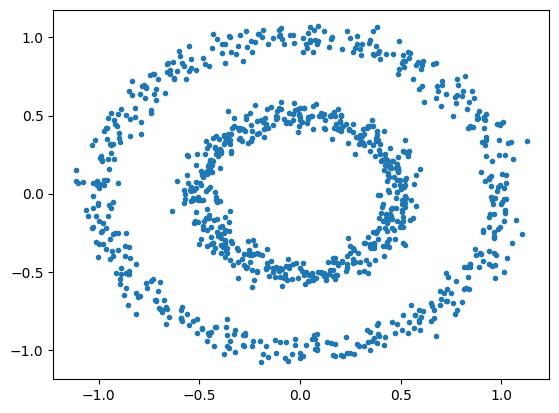

In [41]:
plt.scatter(X2[:,0], X2[:,1], alpha=1, marker='.')

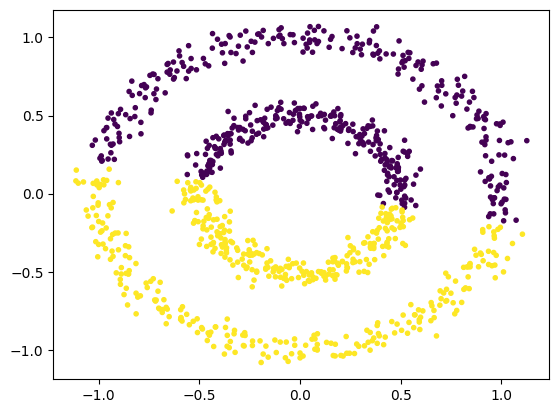

In [42]:
# k=2 make two clusters
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=labels, alpha=1, marker='.')

# 3. Dataset - two moons

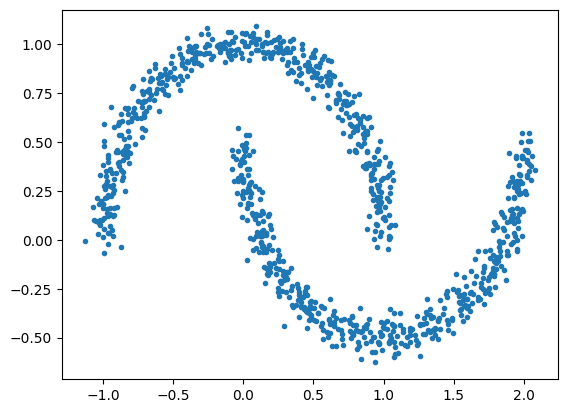

In [44]:
plt.scatter(X3[:,0], X3[:,1], alpha=1, marker='.')

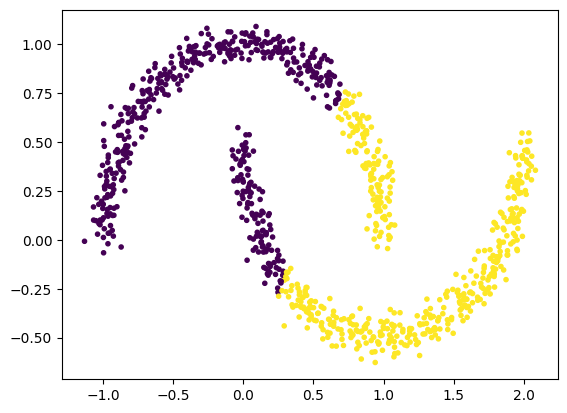

In [46]:
# k=2 make two clusters
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(X3)
plt.scatter(X3[:,0], X3[:,1], c=labels, alpha=1, marker='.')

# 4. Dataset - Random data

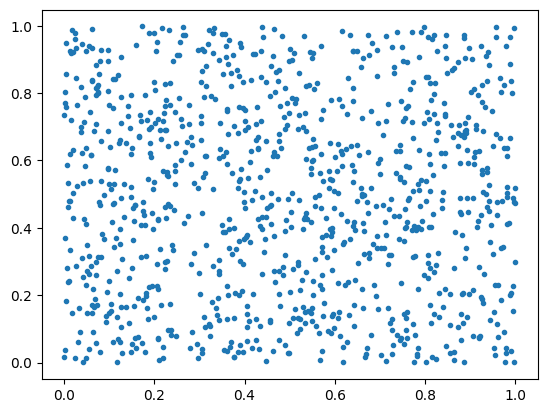

In [9]:
plt.scatter(X4[:,0], X4[:,1], alpha=1, marker='.')

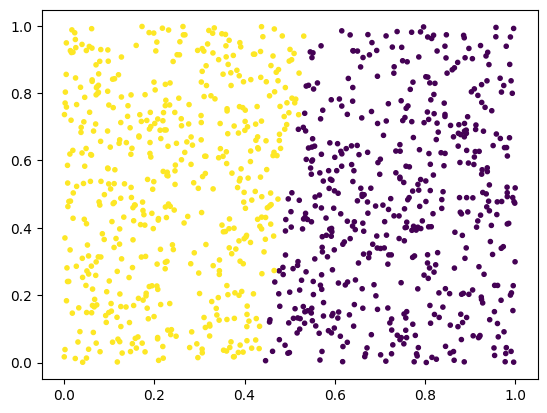

In [47]:
# k=2 make two clusters
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(X4)
plt.scatter(X4[:,0], X4[:,1], c=labels, alpha=1, marker='.')

# KMeans handcoded

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [57]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=123):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

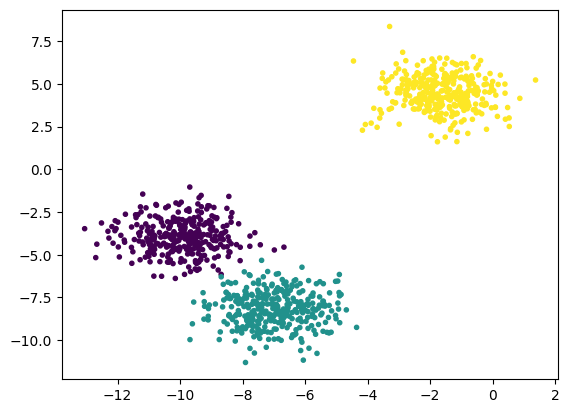

In [58]:
centers, labels_new = find_clusters(X1, 3)
# plt.scatter(X1[:, 0], X1[:, 1], c=labels);
plt.scatter(X1[:,0], X1[:,1], c=labels_new, alpha=1, marker='.')

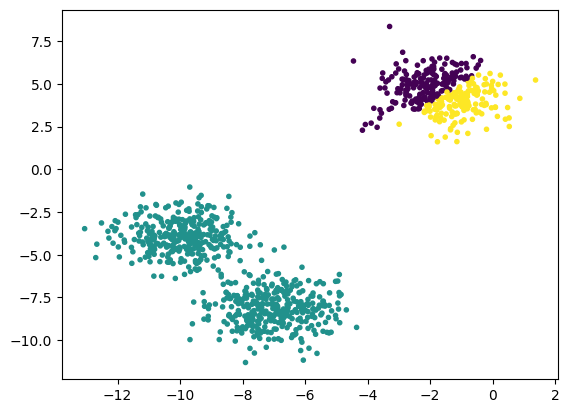

In [59]:
centers, labels_new = find_clusters(X1, 3, rseed=2)
# plt.scatter(X1[:, 0], X1[:, 1], c=labels);
plt.scatter(X1[:,0], X1[:,1], c=labels_new, alpha=1, marker='.')